# Volume 4: Introduction to Initial and Boundary Value Problems

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

In [3]:
def ode(t,y):
    """Define ODE System"""
    return np.array([y[1], np.sin(t)+y[0]])

# Set up Elements and solve system
t_span = (0,5)
y0 = np.array([-.5,0])
sol = solve_ivp(ode, t_span, y0, max_step = .1)

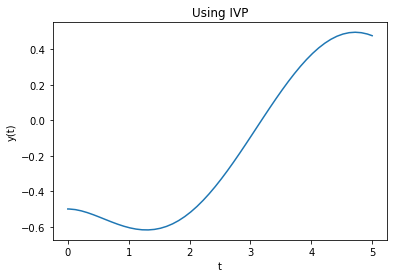

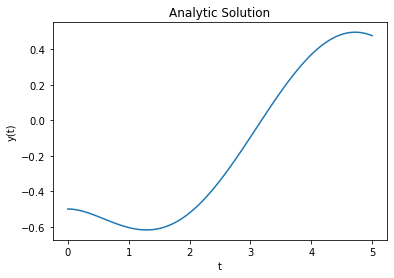

In [9]:
# Plot solution
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Using IVP")
plt.show()

# Plot actual solution
x = np.linspace(0,5,100)
f = lambda x: -.5*(np.exp(-x)+np.sin(x))
plt.plot(x,f(x))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Analytic Solution")
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

In [18]:
def ode(t,y):
    """Define ODE System"""
    return np.array([y[1], -.25*np.exp(-.5*t)+np.sin(t)-np.cos(t)-y[1]])

def bc(ya,yb):
    """Define Boundary Conditions"""
    return np.array([ya[0]-6, yb[1]+.324705])

# Set up elements
t_steps = 100
t = np.linspace(0,5,t_steps)

# Guess and solve
y0 = np.ones((2,t_steps))
sol = solve_bvp(ode, bc, t, y0)

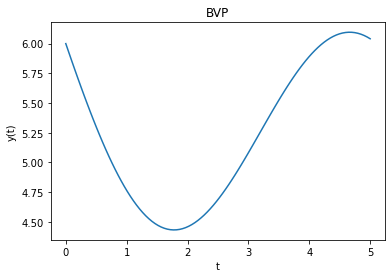

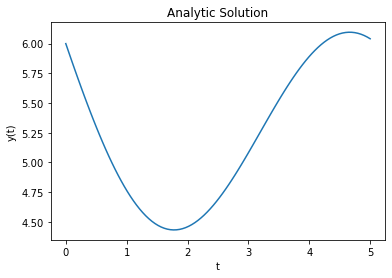

In [20]:
# Plot solution
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("BVP")
plt.show()

# Plot actual solution
x = np.linspace(0,5,100)
f = lambda x: np.exp(-.5*t)-np.sin(t)+5
plt.plot(x,f(x))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Analytic Solution")
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

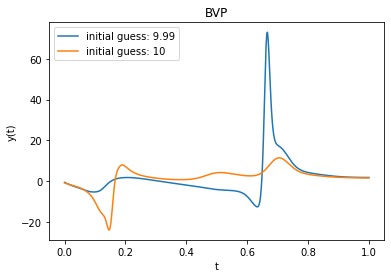

In [29]:
def ode(t,y):
    """Define ODE System"""
    return np.array([y[1], (1-y[1])*10*y[0]])

def bc(ya,yb):
    """Define Boundary Conditions"""
    return np.array([ya[0]+1, yb[0]-1.5])

# Iterate through both guesses
for guess in [9.99,10]:
    t_steps = 50
    t = np.linspace(0,1,t_steps)
    
    y0 = np.ones((2,t_steps))*guess
    sol = solve_bvp(ode, bc, t, y0)
    
    # Plot
    plt.plot(sol.x, sol.y[0], label=f"initial guess: {guess}")
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title("BVP")
    plt.legend(loc=0)
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

In [60]:
def ode(t,x):
    """Define ODE System"""
    return np.array([a*x[0]+x[1]*x[2], b*x[0] + c*x[1] - x[0]*x[2], -x[2] - x[0]*x[1]])

# set up guesses
a = .2
b = .01
c = -.4
guesses = [[a,b,c],[.1,.02,-.3],[-.6,.5,.08],[.33,-.01,-.44]]
sols = []

# Iterate through guesses and solve
for C in guesses:
    t_span = (0,500)
    y0 = np.array(C)
    sols.append(solve_ivp(ode, t_span, y0, max_step = .1))

    

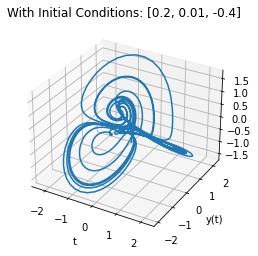

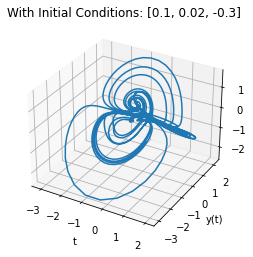

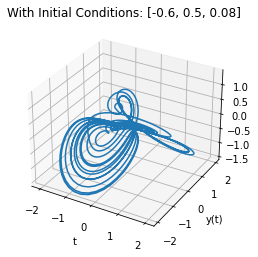

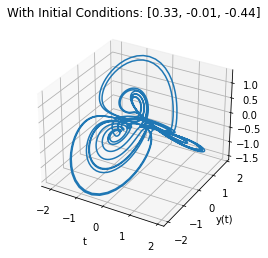

In [61]:
# Iterate through solutions and plot
for i in range(len(sols)):
    ax = plt.subplot(111, projection='3d')
    plt.plot(sols[i].y[0], sols[i].y[1], sols[i].y[2])
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title(f"With Initial Conditions: {guesses[i]}")
    plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

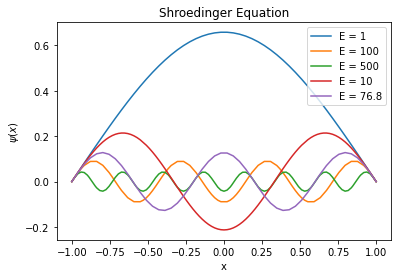

In [86]:
def ode(t,y,p):
    """Define ODE System"""
    return np.array([y[1], -1*p[0]*y[0]+t**2*y[0]])

def bcs(ya,yb, p):
    """Define Boundary Conditions"""
    return np.array([ya[0], ya[1]-1, yb[0]])

# set up elements and guesses
t = np.linspace(-1,1,50)
y_guess = np.ones((2,50))

p_guesses = [[1],[100],[500],[10],[76.8]]

# Iterate through guesses solve and Plot
for p_guess in p_guesses:
    sol = solve_bvp(ode, bcs, t, y_guess, p=p_guess)
    plt.plot(sol.x, sol.y[0], label=f'E = {p_guess[0]}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.title("Shroedinger Equation")
plt.show()